In [3]:
import pandas as pd

# Parquet 파일 경로
parquet_file_path = r'C:\github\MathBridge\spoken_LaTex\Data\df_not_len_5_cleaned_unique_eq.parquet'

# Parquet 파일의 첫 몇 개의 행을 불러오기
df_head = pd.read_parquet(parquet_file_path, engine='pyarrow')

print(df_head.head())   # 데이터의 첫 몇 개의 행을 출력하여 구조 확인
print(df_head.info())   # 데이터의 기본 정보(열 이름, 데이터 타입 등)를 확인



                                      context_before           equation  \
0  The horizontal axis represents the exponent range  $ \in [ 3 , 7 ] $   
1                                               Here          $ d\eta $   
2                               The agent 's actions        $ a ( t ) $   
3  are modeled by a stochastic control process wi...     $ \sigma^2_t $   
4                                               Here        $ \deltat $   

                                       context_after  eq_type paper_number  \
0  . We selected those categorical colors from Co...        0   2301.00002   
1  denotes the system noise , modeled as a Wiener...        0   2301.00005   
2  are modeled by a stochastic control process wi...        0   2301.00005   
3  controlled by the agent and with a mean of zer...        0   2301.00005   
4  denotes the physical time step , and we adopte...        0   2301.00005   

  paper_type  equation_len  
0  arxiv2023            17  
1  arxiv2023          

In [10]:
#test
import re
import json

def load_patterns(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return json.load(file)

def apply_patterns(latex_str, patterns):
    for pattern in patterns:
        regex_pattern = pattern['pattern']
        replacement = pattern['replacement']
        latex_str = re.sub(regex_pattern, lambda m: eval(f'f"{replacement}"'), latex_str)
    return latex_str

def latex_to_english(latex_str, patterns):
    latex_str = latex_str.replace(r'\frac', 'frac')
    return apply_patterns(latex_str, patterns)

# JSON 파일에서 패턴 로드
patterns = load_patterns('patterns.json')

# 사용자로부터 LaTeX 수식 입력받기
latex_str = input("Enter a LaTeX string: ")

try:
    # 변환된 영어 발음 출력
    english_str = latex_to_english(latex_str, patterns)
    print("English pronunciation:", english_str)
except Exception as e:
    print("Error processing LaTeX string:", str(e))
    print("Original LaTeX string:", latex_str)

Error processing LaTeX string: bad escape \l at position 6
Original LaTeX string: \frac{1}{2} \phi \mu


In [1]:
import pandas as pd
import re
import json
import time
from tqdm import tqdm

def load_patterns(filename):
    """JSON 파일에서 패턴 로드"""
    with open(filename, 'r') as file:
        return json.load(file)

def preprocess_latex(latex_str):
    """특정 기호 앞에 공백 추가"""
    # 특정 기호 (\ ^ &) 앞에 공백 추가
    latex_str = re.sub(r'(?<!\s)([\\^&])', r' \1', latex_str)
    
    # LaTeX 명령어와 기호를 공백으로 분리
    latex_str = re.sub(r'(\\[A-Za-z]+)([^A-Za-z\s])', r'\1 \2', latex_str)
    latex_str = re.sub(r'([^A-Za-z\s])(\\[A-Za-z]+)', r'\1 \2', latex_str)
    
    return latex_str

def replace_symbols_with_words(latex_str):
    """기호를 자연어로 변환하고 앞뒤에 공백 추가"""
    replacements = {
        '+': ' plus ',
        '-': ' minus ',
        '/': ' divided by ',
        '_': ' subscript ',
        '^': ' to the power of ',
        '=': ' equals ',
        '<': ' less than ',
        '>': ' greater than ',
        '(': ' open parenthesis ',
        ')': ' close parenthesis ',
        '[': ' open bracket ',
        ']': ' close bracket ',
        '{': ' open brace ',
        '}': ' close brace ',
        '&': ' and ',
        '%': ' percent ',
        '*': ' times ',
        ':': ' colon ',
        ';': ' semicolon ',
        ',': ' comma ',
        '.': ' point ',
        '|': ' vertical bar ',
        '!': ' factorial ',
        '@': ' at ',
        '#': ' hash ',
        '~': ' tilde ',
        '`': ' backtick ',
        '?': ' question mark ',
        '°': ' degree ',
        '∞': ' infinity ',
        'π': ' pi ',
        '∑': ' summation ',
        '∏': ' product ',
        '√': ' square root ',
        '∫': ' integral ',
        '∂': ' partial derivative ',
        '∆': ' delta ',
        '∇': ' nabla ',
        '⊗': ' tensor product ',
        '⊕': ' direct sum ',
        '⊆': ' subset ',
        '⊂': ' proper subset ',
        '∪': ' union ',
        '∩': ' intersection ',
        '≠': ' not equal ',
        '≈': ' approximately equal ',
        '≡': ' identical to ',
        '∈': ' element of ',
        '∉': ' not an element of ',
        '⊂': ' subset of ',
        '⊃': ' superset of ',
        '∪': ' union ',
        '∩': ' intersection ',
        'ℵ': ' aleph ',
        'ℶ': ' beth ',
        'ℷ': ' gimel ',
        'ℸ': ' daleth ',
        '→': ' right arrow ',
        '←': ' left arrow ',
        '↑': ' up arrow ',
        '↓': ' down arrow ',
        '↔': ' left-right arrow ',
        '⇔': ' if and only if ',
    }

    # 기호를 자연어로 변환하고 앞뒤에 공백 추가
    for symbol, word in replacements.items():
        latex_str = latex_str.replace(symbol, f' {word} ')
    
    return latex_str

def remove_backslash_in_space(latex_str):
    return re.sub(r'\s\\\s',' ',latex_str)

def apply_patterns(latex_str, patterns):
    """패턴을 적용하여 LaTeX 수식을 자연어로 변환"""
    latex_str = preprocess_latex(latex_str)
    latex_str = replace_symbols_with_words(latex_str)  # 기호를 먼저 변환
    
    for pattern in patterns:
        regex_pattern = pattern['pattern']
        replacement = pattern['replacement']
        
        # 정규식에서 \ 를 이스케이프 처리
        regex_pattern = re.escape(regex_pattern)
        
        latex_str = re.sub(regex_pattern, lambda m: eval(f'f"{replacement}"'), latex_str)
    
    # 변환 후 중복된 공백 제거
    latex_str = re.sub(r'\s+', ' ', latex_str).strip()
    
    return latex_str

def latex_to_english(latex_str, patterns):
    """LaTeX 수식을 자연어로 변환"""
    latex_str = apply_patterns(latex_str, patterns)
    latex_str = latex_str.replace('$', '')  # $ 기호 삭제

    latex_str = latex_str.replace(r'\frac', 'frac')
    latex_str = remove_backslash_in_space(latex_str)
    return latex_str

# JSON 파일에서 패턴 로드
patterns = load_patterns('patterns.json')

# Parquet 파일 경로
parquet_file_path = r'C:\github\MathBridge\spoken_LaTex\Data\df_not_len_5_cleaned_unique_eq.parquet'

# Parquet 파일의 데이터를 한 번에 불러오기
df = pd.read_parquet(parquet_file_path, engine='pyarrow')

# 랜덤으로 1000개의 데이터를 샘플링
df_sampled = df.sample(n=1000, random_state=42)

# 변환 작업 전 시간 기록
start_time = time.time()

# tqdm을 사용하여 진행률 표시 및 로그 추가
equation_en = []
complete = []

for equation in tqdm(df_sampled['equation'], desc="Processing equations", unit="equations"):
    en_equation = latex_to_english(equation, patterns)
    equation_en.append(en_equation)
    # \ 기호가 있는지 확인하여 complete 항목 생성
    complete.append(0 if '\\' in en_equation else 1)

# 새로운 열에 변환 결과 및 complete 항목 추가
df_sampled['equation_en'] = equation_en
df_sampled['complete'] = complete

# complete 항목을 기준으로 0과 1로 데이터셋 분리
df_complete_1 = df_sampled[df_sampled['complete'] == 1]
df_complete_0 = df_sampled[df_sampled['complete'] == 0]

# 비율 계산
complete_1_ratio = len(df_complete_1) / len(df_sampled) * 100
complete_0_ratio = len(df_complete_0) / len(df_sampled) * 100

# 변환 작업 후 시간 기록 및 처리 속도 계산
end_time = time.time()
elapsed_time = end_time - start_time
speed = len(df_sampled) / elapsed_time

# 결과를 parquet 파일로 저장
output_parquet_path = r'C:\github\MathBridge\spoken_LaTex\Data\df_sampled_1000_cleaned_unique_eq_en.parquet'
df_sampled.to_parquet(output_parquet_path, engine='pyarrow', index=False)

# 각각의 complete 값에 따른 데이터셋 저장
output_complete_1_path = r'C:\github\MathBridge\spoken_LaTex\Data\df_sampled_1000_cleaned_unique_eq_en_complete_1.parquet'
output_complete_0_path = r'C:\github\MathBridge\spoken_LaTex\Data\df_sampled_1000_cleaned_unique_eq_en_complete_0.parquet'

df_complete_1.to_parquet(output_complete_1_path, engine='pyarrow', index=False)
df_complete_0.to_parquet(output_complete_0_path, engine='pyarrow', index=False)

# 로그 출력
print(f"Transformation complete and saved to {output_parquet_path}")
print(f"Total time taken: {elapsed_time:.2f} seconds")
print(f"Processing speed: {speed:.2f} equations per second")
print(f"Complete 1 ratio: {complete_1_ratio:.2f}%")
print(f"Complete 0 ratio: {complete_0_ratio:.2f}%")
print(f"Complete 1 data saved to {output_complete_1_path}")
print(f"Complete 0 data saved to {output_complete_0_path}")

In [1]:
#patterns feedback system
import pandas as pd
import re
from collections import Counter

# Parquet 파일 경로 (자신의 로컬 경로로 변경하세요)
parquet_file_path = 'C:/github/MathBridge/spoken_LaTex/Data/df_cleaned_unique_eq_en_complete_0.parquet'

# Parquet 파일의 데이터를 불러오기
df = pd.read_parquet(parquet_file_path, engine='pyarrow')

# equation_en 항목에서 \으로 시작하는 단어들을 추출
pattern = re.compile(r'\\\w+')
all_words = df['equation_en'].apply(lambda x: pattern.findall(x))

# 단어 리스트를 평탄화하고 빈도를 계산
flat_list = [item for sublist in all_words for item in sublist]
word_counts = Counter(flat_list)

# 많이 나온 단어들을 내림차순으로 정렬하여 출력
sorted_word_counts = word_counts.most_common()

# 결과 출력
for word, freq in sorted_word_counts:
    print(f'{word}: {freq}')


\mathcal: 53
\mathbb: 30
\mathbf: 30
\tilde: 25
\ell: 25
\bm: 22
\mathrm: 21
\hat: 21
\sqrt: 20
\text: 20
\left: 16
\right: 16
\ldots: 14
\varphi: 13
\vec: 13
\setminus: 10
\star: 9
\varepsilon: 8
\boldsymbol: 8
\rightarrow: 8
\circ: 8
\cal: 7
\ket: 7
\overline: 7
\le: 7
\prime: 7
\mathfrak: 6
\widehat: 6
\perp: 5
\mbox: 5
\dots: 5
\vert: 5
\sum: 5
\mathsf: 5
\colon: 5
\exp: 4
\min: 4
\max: 4
\cX: 4
\Z: 4
\wedge: 4
\rangle: 4
\widetilde: 4
\bullet: 4
\bi: 4
\textsc: 3
\mathit: 3
\ref: 3
\cat: 3
\hbar: 3
\overset: 3
\langle: 3
\R: 3
\m: 3
\lVert: 3
\br: 3
\p: 2
\Re: 2
\triangle: 2
\d: 2
\N: 2
\textrm: 2
\ad: 2
\red: 2
\ps: 2
\V: 2
\Fc: 2
\Pc: 2
\not: 2
\Exc: 2
\Sc: 2
\PP: 2
\neg: 2
\cB: 2
\underset: 2
\reals: 2
\prod: 2
\fx: 2
\Wbb: 2
\cS: 2
\ii: 2
\bOmega: 2
\bW: 2
\bx: 2
\rVert: 2
\gl: 2
\vm: 2
\C: 2
\mbf: 2
\ensuremath: 2
\P: 2
\mathscr: 2
\eps: 2
\mid: 2
\bd: 2
\lim: 2
\seq: 2
\RR: 2
\bra: 2
\TT: 2
\rest: 2
\defset: 2
\conf: 2
\depth: 2
\cL: 2
\ra: 2
\mb: 2
\Pcal: 2
\B: 2
\uparrow: 

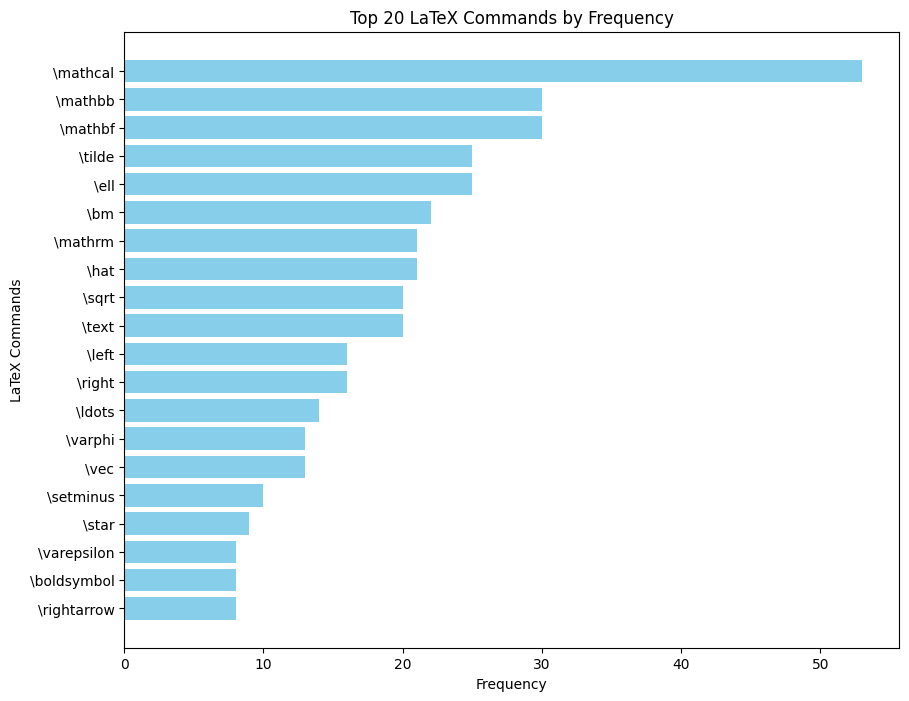

\mathcal: 53
\mathbb: 30
\mathbf: 30
\tilde: 25
\ell: 25
\bm: 22
\mathrm: 21
\hat: 21
\sqrt: 20
\text: 20
\left: 16
\right: 16
\ldots: 14
\varphi: 13
\vec: 13
\setminus: 10
\star: 9
\varepsilon: 8
\boldsymbol: 8
\rightarrow: 8
\circ: 8
\cal: 7
\ket: 7
\overline: 7
\le: 7
\prime: 7
\mathfrak: 6
\widehat: 6
\perp: 5
\mbox: 5
\dots: 5
\vert: 5
\sum: 5
\mathsf: 5
\colon: 5
\exp: 4
\min: 4
\max: 4
\cX: 4
\Z: 4
\wedge: 4
\rangle: 4
\widetilde: 4
\bullet: 4
\bi: 4
\textsc: 3
\mathit: 3
\ref: 3
\cat: 3
\hbar: 3
\overset: 3
\langle: 3
\R: 3
\m: 3
\lVert: 3
\br: 3
\p: 2
\Re: 2
\triangle: 2
\d: 2
\N: 2
\textrm: 2
\ad: 2
\red: 2
\ps: 2
\V: 2
\Fc: 2
\Pc: 2
\not: 2
\Exc: 2
\Sc: 2
\PP: 2
\neg: 2
\cB: 2
\underset: 2
\reals: 2
\prod: 2
\fx: 2
\Wbb: 2
\cS: 2
\ii: 2
\bOmega: 2
\bW: 2
\bx: 2
\rVert: 2
\gl: 2
\vm: 2
\C: 2
\mbf: 2
\ensuremath: 2
\P: 2
\mathscr: 2
\eps: 2
\mid: 2
\bd: 2
\lim: 2
\seq: 2
\RR: 2
\bra: 2
\TT: 2
\rest: 2
\defset: 2
\conf: 2
\depth: 2
\cL: 2
\ra: 2
\mb: 2
\Pcal: 2
\B: 2
\uparrow: 

In [2]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Parquet 파일 경로 (자신의 로컬 경로로 변경하세요)
parquet_file_path = 'C:/github/MathBridge/spoken_LaTex/Data/df_cleaned_unique_eq_en_complete_0.parquet'

# Parquet 파일의 데이터를 불러오기
df = pd.read_parquet(parquet_file_path, engine='pyarrow')

# equation_en 항목에서 \으로 시작하는 단어들을 추출
pattern = re.compile(r'\\\w+')
all_words = df['equation_en'].apply(lambda x: pattern.findall(x))

# 단어 리스트를 평탄화하고 빈도를 계산
flat_list = [item for sublist in all_words for item in sublist]
word_counts = Counter(flat_list)

# 많이 나온 단어들을 내림차순으로 정렬
sorted_word_counts = word_counts.most_common()

# 상위 20개의 단어를 추출하여 시각화
top_words = sorted_word_counts[:20]
words, frequencies = zip(*top_words)

# 표로 시각화
plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('LaTeX Commands')
plt.title('Top 20 LaTeX Commands by Frequency')
plt.gca().invert_yaxis()  # 빈도수가 높은 것이 위로 오도록 y축 반전
plt.show()

# 결과 출력 (Optional)
for word, freq in sorted_word_counts:
    print(f'{word}: {freq}')
